In [158]:
import pandas as pd
df=pd.read_csv('LokSabha2024_Results.csv')
df.head()

,Parliamentary Constituency,PC_no,State,Winning Candidate,Party,Total_electors,Total_votes,Turnout,Margin,Margin_Percent
0,Adilabad,1,Telangana,Godam Nagesh,Bharatiya Janta Party,"16,50,175","12,35,597",74.90%,"90,652",7.30%
1,Agra,18,Uttar Pradesh,Prof S P Singh Baghel,Bharatiya Janta Party,"20,72,685","11,23,779",54.20%,"2,71,294",24.10%
2,Ahmadnagar,37,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,"19,81,866","13,25,477",66.90%,"28,929",2.20%
3,Ahmedabad East,7,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,"20,38,162","11,28,339",55.40%,"4,61,755",40.90%
4,Ahmedabad West,8,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,"17,26,987","9,66,646",56.00%,"2,86,437",29.60%


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Parliamentary Constituency  543 non-null    object
 1   PC_no                       543 non-null    int64 
 2   State                       543 non-null    object
 3   Winning Candidate           543 non-null    object
 4   Party                       543 non-null    object
 5   Total_electors              543 non-null    object
 6   Total_votes                 542 non-null    object
 7   Turnout                     542 non-null    object
 8   Margin                      542 non-null    object
 9   Margin_Percent              542 non-null    object
dtypes: int64(1), object(9)
memory usage: 42.5+ KB


**Observation:**  
We can see that only 1 entry in some columns has NULL value.  
So we write code to get the index for rows having atleast 1 NULL value.


In [160]:
rows_with_nulls_index = df[df.isnull().any(axis=1)].index
print(rows_with_nulls_index)

Index([493], dtype='int64')


**Observation:**  
Only 1 row[494], i.e. Surat has NULL values.  
That's because elections were not held in Surat as the other independent candidates had withdrawn nomination before the elections.  
The INC candidate's nomination papers were rejected.
The winning candiate won unopposed.


In [161]:
df.loc[494]

Parliamentary Constituency                     Surendranagar
PC_no                                                      9
State                                                Gujarat
Winning Candidate             Chandubhai Chhaganbhai Shihora
Party                                  Bharatiya Janta Party
Total_electors                                     20,33,419
Total_votes                                        11,31,377
Turnout                                               55.60%
Margin                                              2,61,617
Margin_Percent                                        23.10%
Name: 494, dtype: object

We fill the Nan values with 0. We cannot remove the row, as it will reduce 1 seat (distort data).

In [162]:
results_df=df.fillna(0)
results_df.loc[494]

Parliamentary Constituency                     Surendranagar
PC_no                                                      9
State                                                Gujarat
Winning Candidate             Chandubhai Chhaganbhai Shihora
Party                                  Bharatiya Janta Party
Total_electors                                     20,33,419
Total_votes                                        11,31,377
Turnout                                               55.60%
Margin                                              2,61,617
Margin_Percent                                        23.10%
Name: 494, dtype: object

# Analyzing voter turnout:

In [163]:
results=results_df.copy()

results['Turnout'] = results['Turnout'].str.replace('%', '').str.replace(' ', '')
results['Turnout'] = pd.to_numeric(results['Turnout'], errors='coerce')


results['Total_electors'] = pd.to_numeric(results['Total_electors'], errors='coerce')
results['Total_votes'] = pd.to_numeric(results['Total_votes'], errors='coerce')
results['Margin'] = pd.to_numeric(results['Margin'], errors='coerce')
results['Margin_Percent'] = pd.to_numeric(results['Margin_Percent'], errors='coerce')


results.dropna(subset=['Turnout'], inplace=True)


overall_turnout = results['Turnout'].mean()
print(f"Overall voter turnout: {overall_turnout:.2f}%")


top_10_turnout = results.nlargest(10, 'Turnout')[['Parliamentary Constituency', 'State', 'Turnout']]
print("\nTop 10 constituencies by voter turnout:")
print(top_10_turnout)


bottom_10_turnout = results.nsmallest(10, 'Turnout')[['Parliamentary Constituency', 'State', 'Turnout']]
print("\nBottom 10 constituencies by voter turnout:")
print(bottom_10_turnout)


Overall voter turnout: 66.89%

Top 10 constituencies by voter turnout:
    Parliamentary Constituency              State  Turnout
155                     Dhubri              Assam     92.2
392                     Ongole     Andhra Pradesh     88.5
130                   Chittoor     Andhra Pradesh     86.5
64                     Bapatla     Andhra Pradesh     86.4
380               Narasaraopet     Andhra Pradesh     86.4
106                  Bishnupur        West Bengal     86.3
36              Arunachal East  Arunachal Pradesh     86.2
74                     Barpeta              Assam     85.7
213                   Hindupur     Andhra Pradesh     85.5
269                     Kanthi        West Bengal     85.3

Bottom 10 constituencies by voter turnout:
    Parliamentary Constituency              State  Turnout
488                   Srinagar  Jammu and Kashmir     38.6
384                     Nawada              Bihar     43.4
406                Patna Sahib              Bihar     46.9


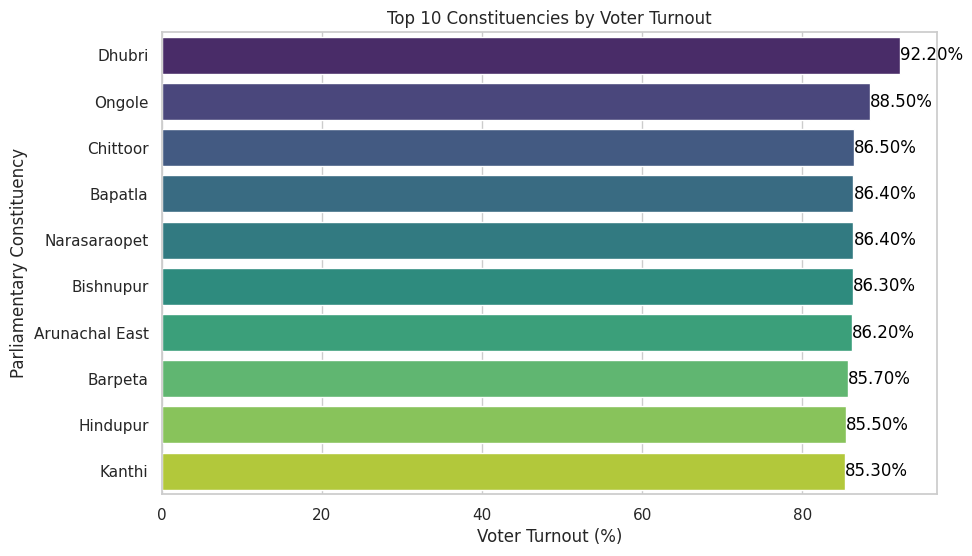

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_turnout = results.nlargest(10, 'Turnout')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Turnout', y='Parliamentary Constituency', data=top_10_turnout, hue='Parliamentary Constituency', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Constituencies by Voter Turnout')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Parliamentary Constituency')


for index, value in enumerate(top_10_turnout['Turnout']):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")

plt.show()

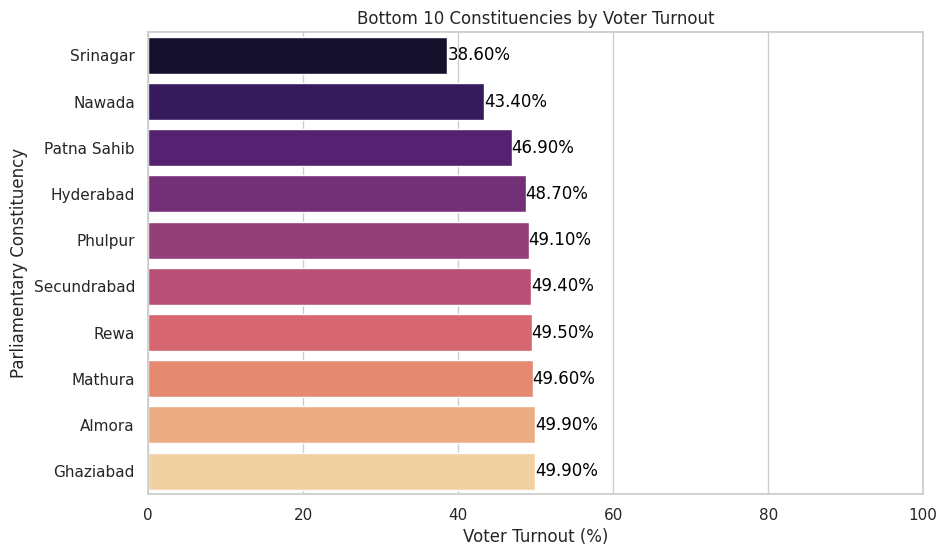

In [165]:
bottom_10_turnout = results.nsmallest(10, 'Turnout')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Turnout', y='Parliamentary Constituency', data=bottom_10_turnout, hue='Parliamentary Constituency', palette='magma', dodge=False, legend=False)
plt.title('Bottom 10 Constituencies by Voter Turnout')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Parliamentary Constituency')


for index, value in enumerate(bottom_10_turnout['Turnout']):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")
plt.xlim(0, 100)
plt.show()

<ipython-input-166-d11ea94c507d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Turnout', y='State', data=top_5_states, palette='viridis', dodge=False, legend=False)


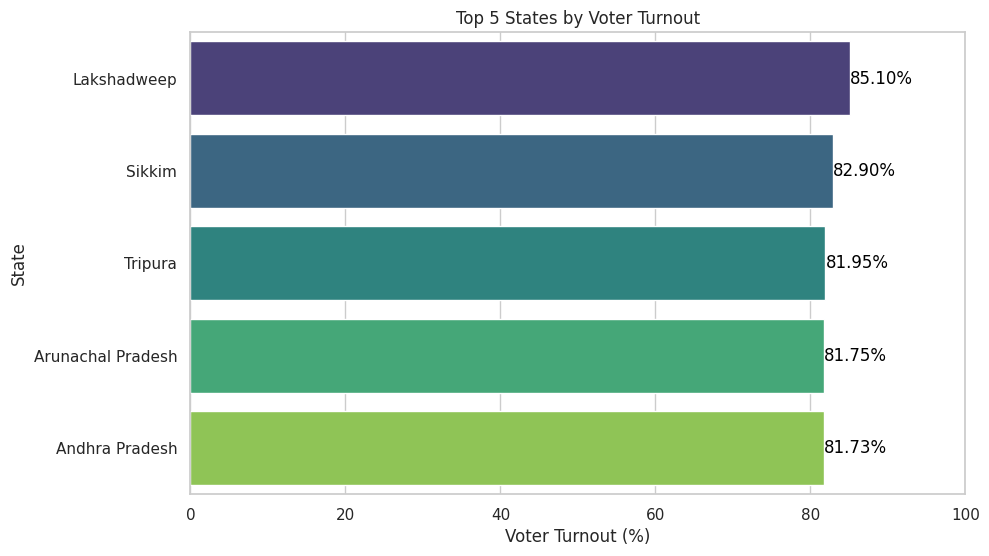

<ipython-input-166-d11ea94c507d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Turnout', y='State', data=bottom_5_states, palette='magma', dodge=False, legend=False)


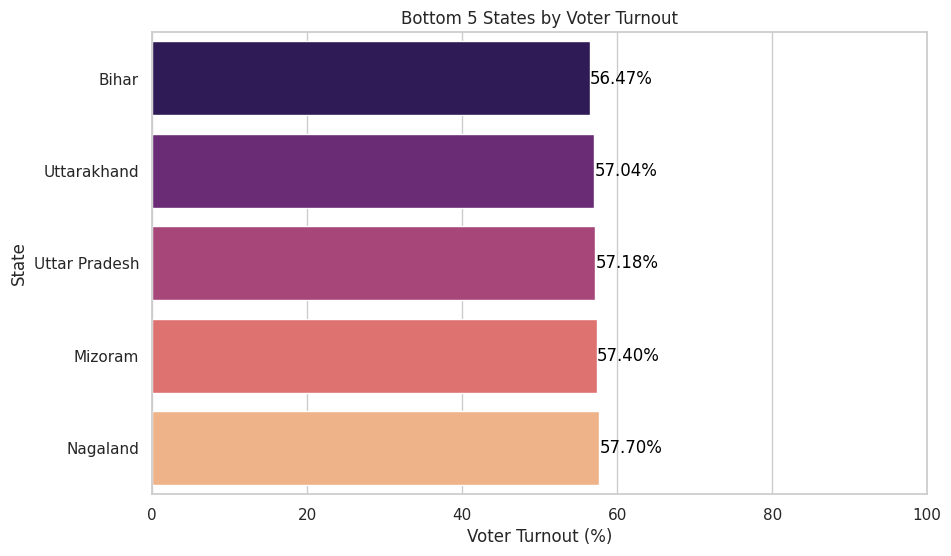

In [166]:
state_turnout = results.groupby('State')['Turnout'].mean().reset_index()


top_5_states = state_turnout.nlargest(5, 'Turnout')
bottom_5_states = state_turnout.nsmallest(5, 'Turnout')


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Turnout', y='State', data=top_5_states, palette='viridis', dodge=False, legend=False)
plt.title('Top 5 States by Voter Turnout')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('State')


for index, value in enumerate(top_5_states['Turnout']):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")

plt.xlim(0, 100)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Turnout', y='State', data=bottom_5_states, palette='magma', dodge=False, legend=False)
plt.title('Bottom 5 States by Voter Turnout')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('State')


for index, value in enumerate(bottom_5_states['Turnout']):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")

plt.xlim(0, 100)
plt.show()

In [167]:
import geopandas as gpd
india_map = gpd.read_file('/content/gadm41_IND_1.shp')
india_map = india_map.merge(state_turnout, how='left', left_on='NAME_1', right_on='State')

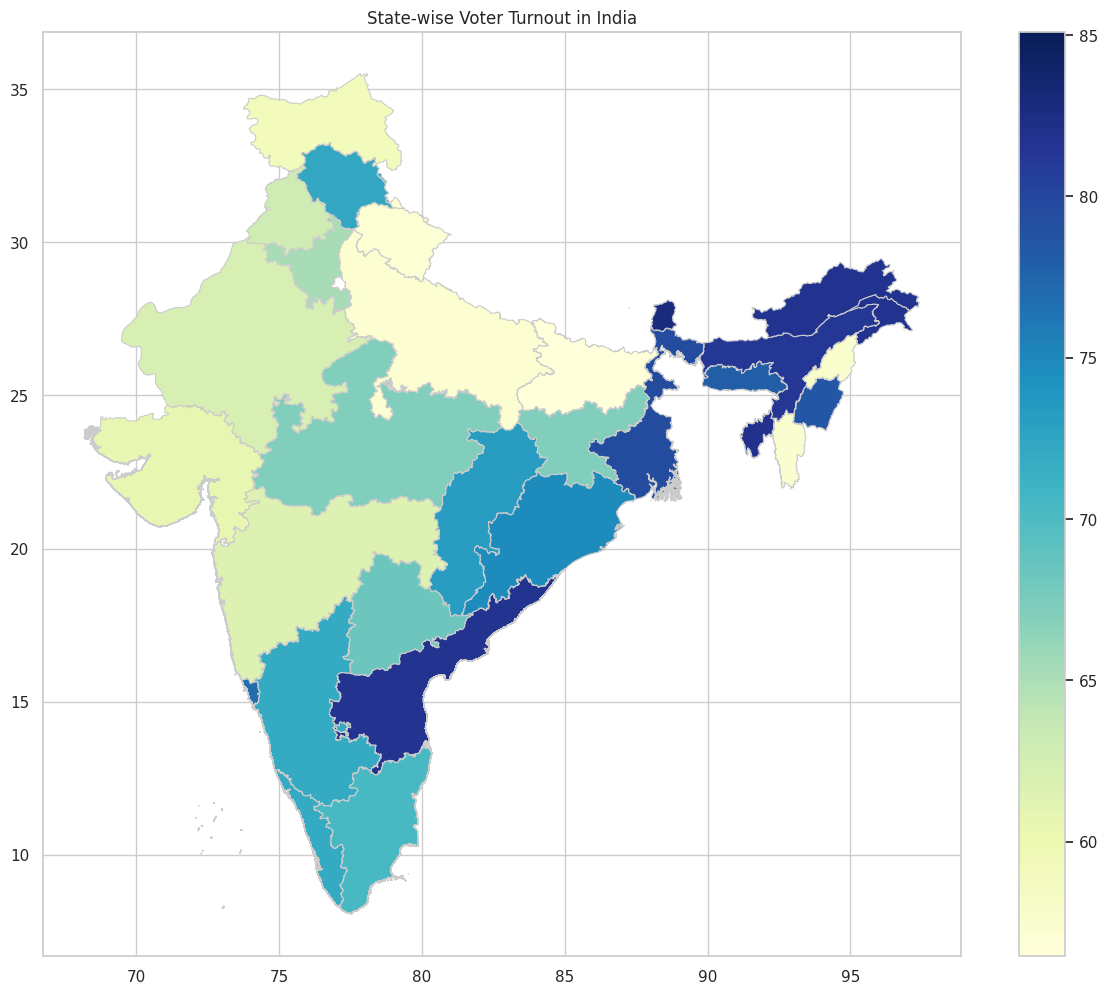

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
india_map.plot(column='Turnout', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('State-wise Voter Turnout in India')
plt.show()

# Partywise Performance:


In [169]:
results1=results_df.copy()



results1['Turnout'] = results1['Turnout'].str.replace('%', '').str.replace(' ', '')
results1['Turnout'] = pd.to_numeric(results1['Turnout'], errors='coerce')


results1['Total_electors'] = results1['Total_electors'].str.replace(',', '').astype(float)
results1['Total_votes'] = results1['Total_votes'].str.replace(',', '').astype(float)
results1['Margin'] = results1['Margin'].str.replace(',', '').astype(float)
results1['Margin_Percent'] = results1['Margin_Percent'].str.replace('%', '').astype(float)

# Calculate the number of seats won by each party
seats_won = results1['Party'].value_counts().reset_index()
seats_won.columns = ['Party', 'Seats Won']

# Calculate the average margin of victory for each party
average_margin = results1.groupby('Party')['Margin'].mean().reset_index()
average_margin.columns = ['Party', 'Average Margin of Victory']

# Calculate the average margin percentage for each party
average_margin_percent = results1.groupby('Party')['Margin_Percent'].mean().reset_index()
average_margin_percent.columns = ['Party', 'Average Margin Percentage']



# Merge  metrics into a single DataFrame
party_performance = seats_won.merge(average_margin, on='Party')
party_performance = party_performance.merge(average_margin_percent, on='Party')



print(party_performance)




                                                Party  Seats Won  \
0                               Bharatiya Janta Party        240   
1                            Indian National Congress         99   
2                                     Samajwadi Party         37   
3                        All India Trinamool Congress         29   
4                           Dravida Munnetra Kazhagam         22   
5                                        Telugu Desam         16   
6                                 Janata Dal (United)         12   
7               Shiv Sena (Uddhav Balasaheb Thackrey)          9   
8    Nationalist Congress Party – Sharadchandra Pawar          8   
9                                         Independent          7   
10                                          Shiv Sena          7   
11                     Lok Janshakti Party(Ram Vilas)          5   
12                 Communist Party Of India (Marxist)          4   
13              Yuvajana Sramika Rythu Congress 

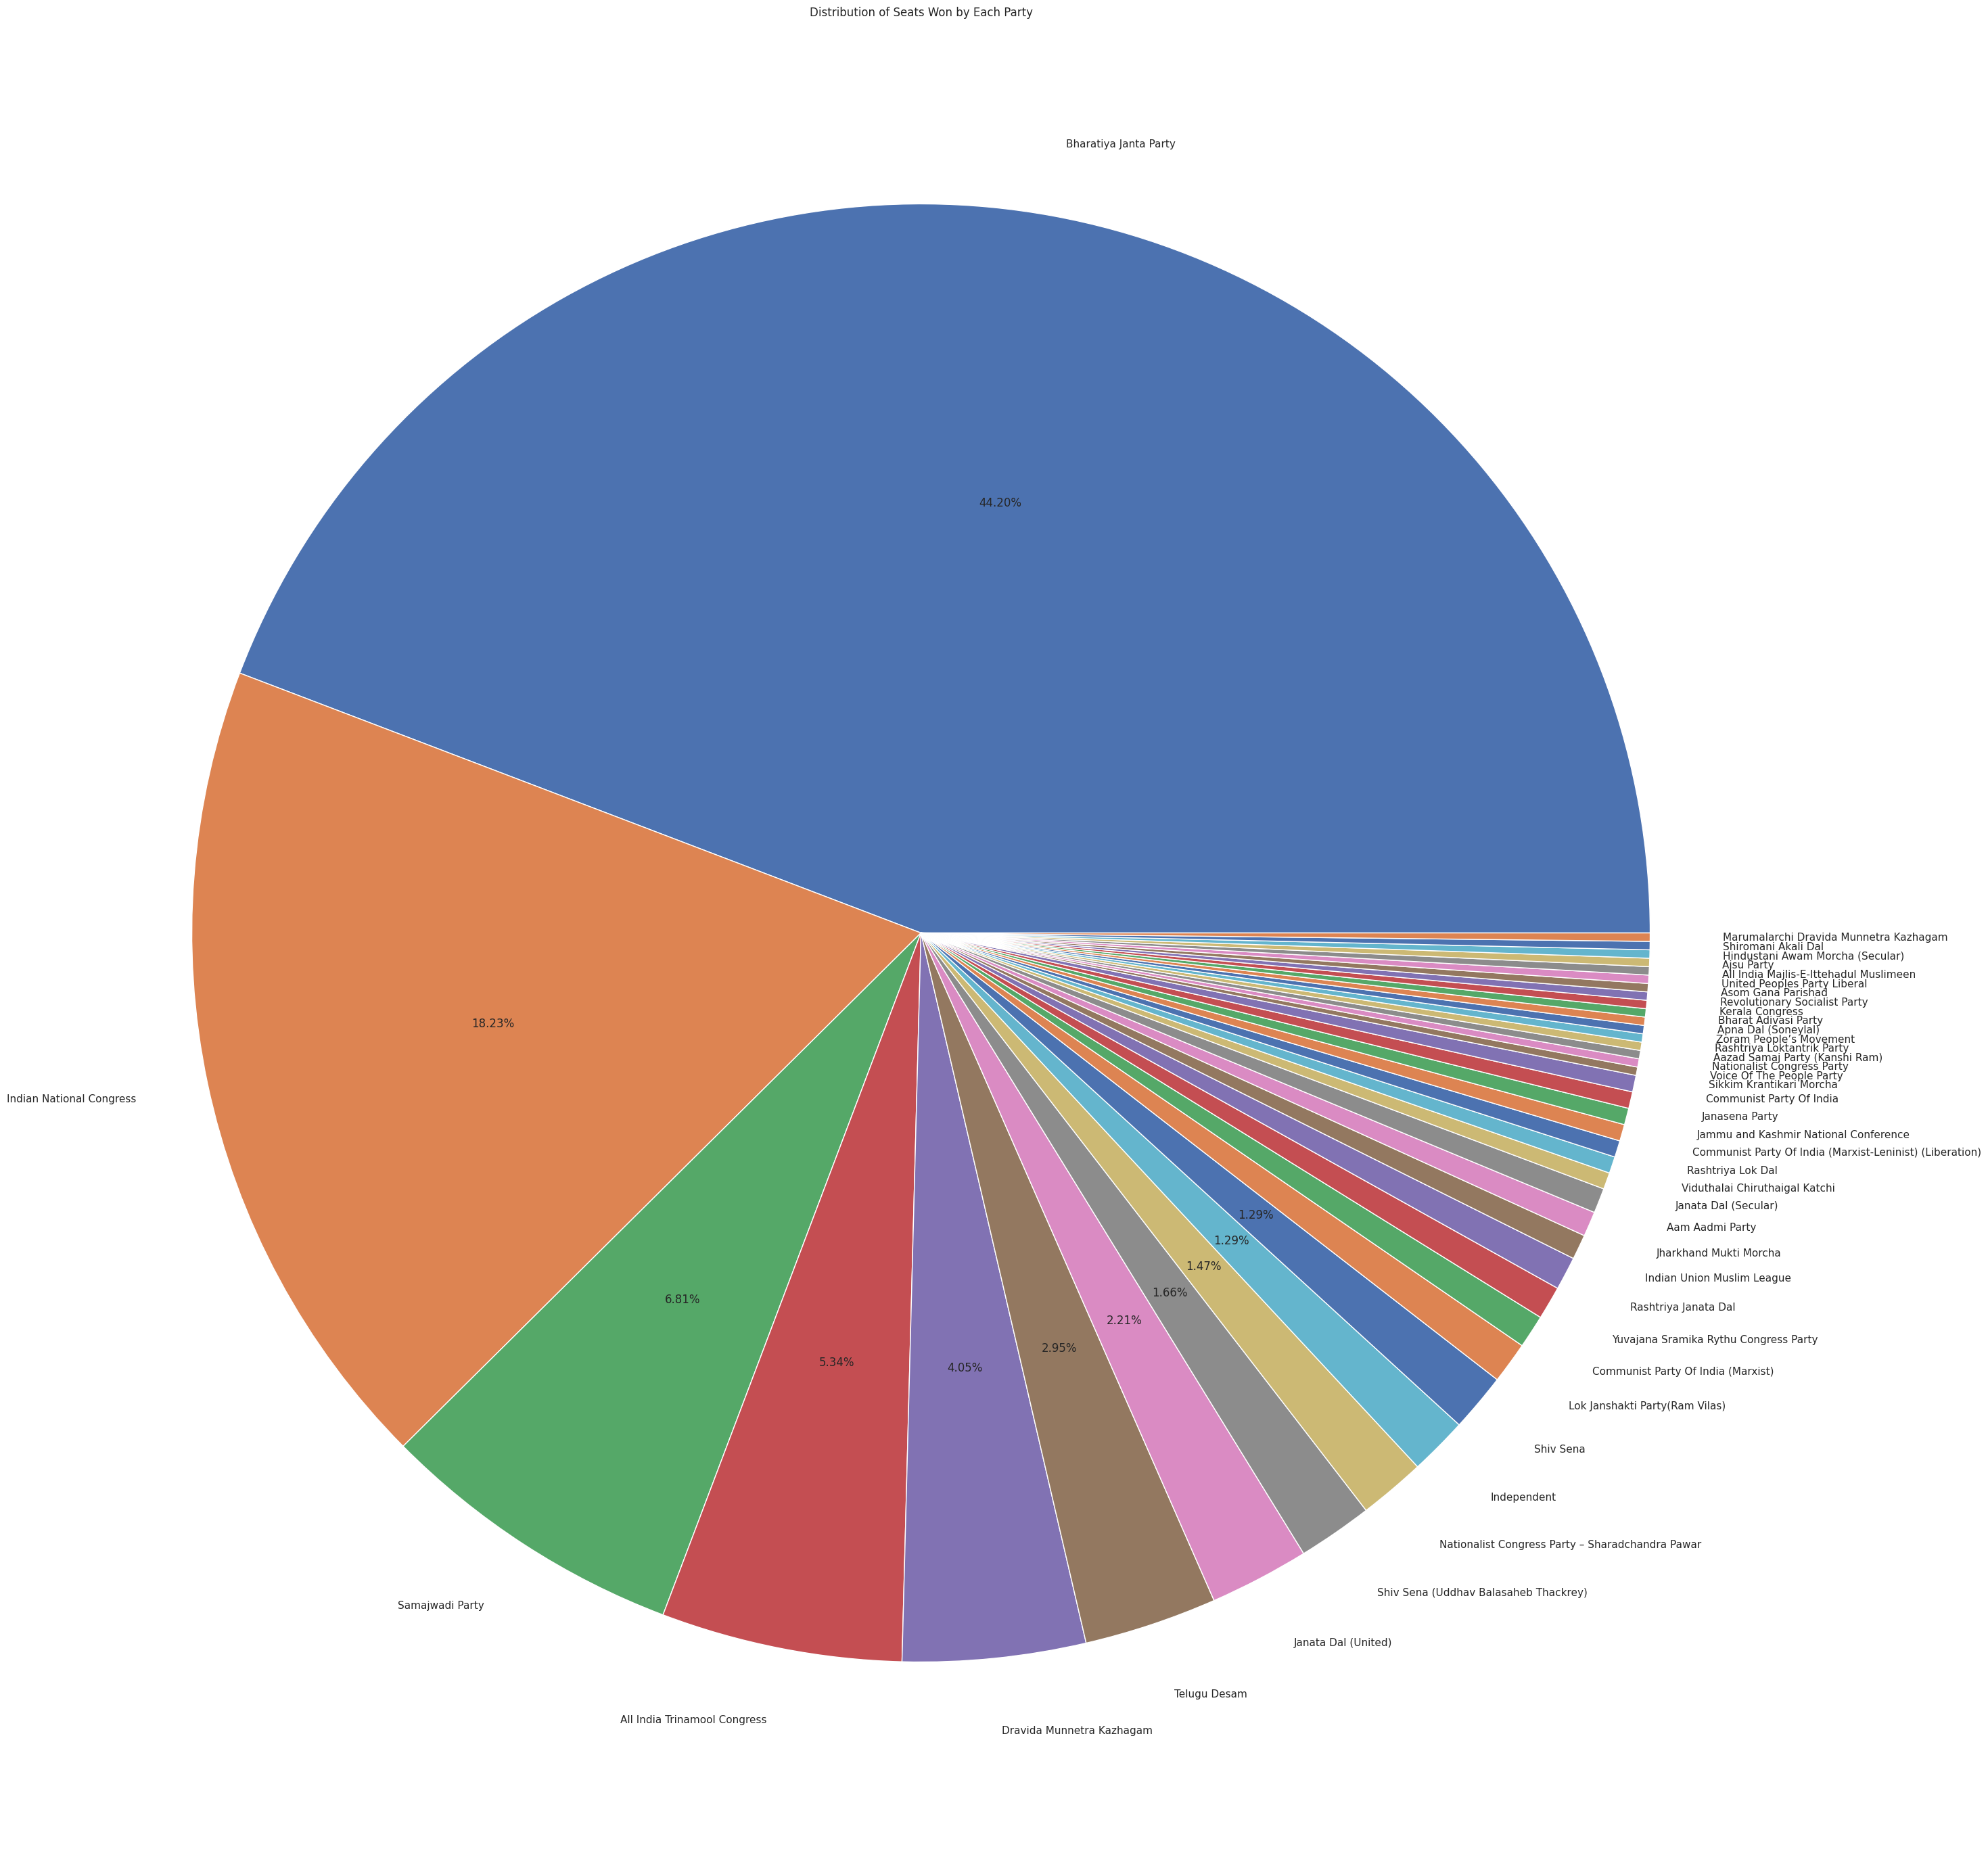

In [170]:
plt.figure(figsize=(35,35))
autopct = lambda v: f'{v:.2f}%' if v > 1 else None
plt.pie(party_performance['Seats Won'], labels=party_performance['Party'],autopct=autopct)
plt.title('Distribution of Seats Won by Each Party')
plt.show()

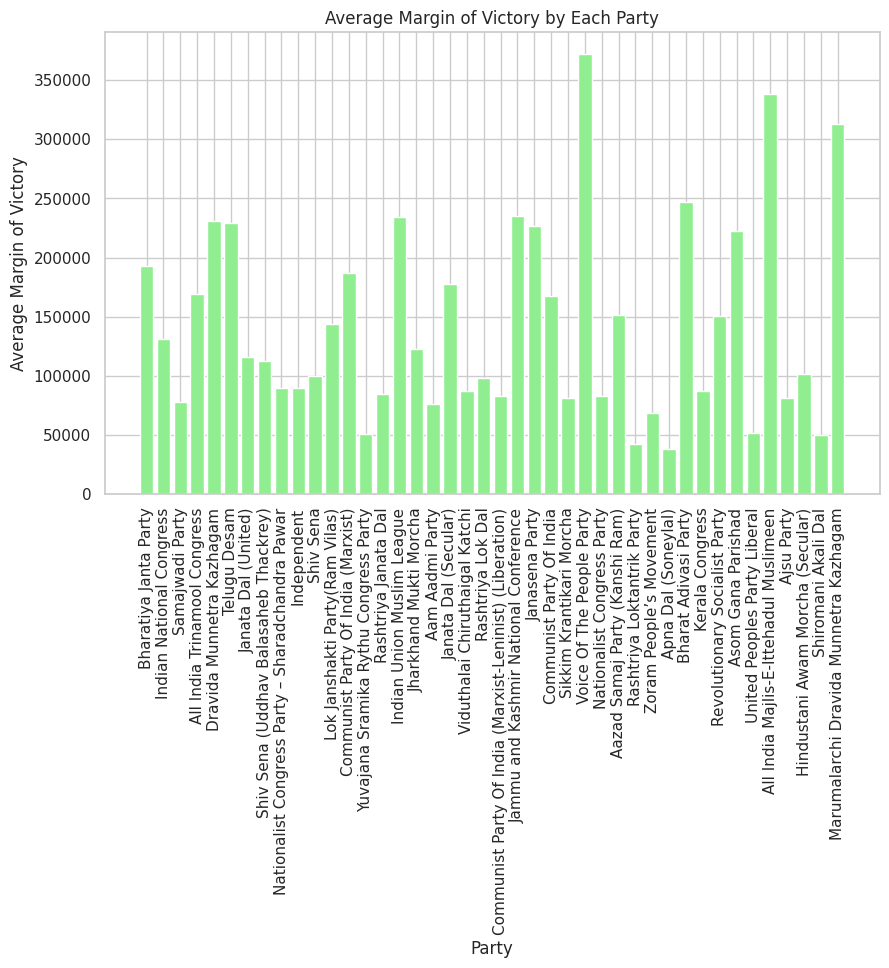

In [171]:
plt.figure(figsize=(10, 6))
plt.bar(party_performance['Party'], party_performance['Average Margin of Victory'], color='lightgreen')
plt.xlabel('Party')
plt.ylabel('Average Margin of Victory')
plt.title('Average Margin of Victory by Each Party')
plt.xticks(rotation=90)
plt.show()

# Problem with this dataset:
We cannot visualize votes polled per party, as votes polled for each candidate in a PC is not mentioned.


# Candidate Analysis:

In [172]:
results2=results_df.copy()
results2['Total_electors'] = results2['Total_electors'].str.replace(',', '').astype(float)
results2['Total_votes'] = results2['Total_votes'].str.replace(',', '').astype(float)
results2['Turnout'] = results2['Turnout'].str.replace('%', '').astype(float)
results2['Margin'] = results2['Margin'].str.replace(',', '').astype(float)
results2['Margin_Percent'] = results2['Margin_Percent'].str.replace('%', '').astype(float)


print(results2.dtypes)

Parliamentary Constituency     object
PC_no                           int64
State                          object
Winning Candidate              object
Party                          object
Total_electors                float64
Total_votes                   float64
Turnout                       float64
Margin                        float64
Margin_Percent                float64
dtype: object


In [173]:
num_candidates = results2['Winning Candidate'].nunique()
print(f"Number of unique candidates: {num_candidates}")
#As Rahul Gandhi contested two seats

Number of unique candidates: 542


In [174]:
reoccuring_candidate= results2['Winning Candidate'].value_counts().head(10)
print(reoccuring_candidate)

Winning Candidate
Rahul Gandhi                               2
Godam Nagesh                               1
Raj Bhushan Choudhary                      1
Arvind Ganpat Sawant                       1
Anil Yeshwant Desai                        1
Rajiv Ranjan Singh Alias Lalan Singh       1
Abu Taher Khan                             1
Harendra Singh Malik                       1
Yaduveer Krishnadatta Chamaraja Wadiyar    1
Sanjay Dina Patil                          1
Name: count, dtype: int64


In [175]:
state_seats= results2['State'].value_counts()
print('States per seat: ')
print(state_seats)

States per seat: 
State
Uttar Pradesh                80
Maharashtra                  48
West Bengal                  42
Bihar                        40
Tamil Nadu                   39
Madhya Pradesh               29
Karnataka                    28
Gujarat                      26
Rajasthan                    25
Andhra Pradesh               25
Odisha                       21
Kerala                       20
Telangana                    17
Assam                        14
Jharkhand                    14
Punjab                       13
Chhattisgarh                 11
Haryana                      10
Delhi                         7
Jammu and Kashmir             5
Uttarakhand                   5
Himachal Pradesh              4
Tripura                       2
Manipur                       2
Goa                           2
Meghalaya                     2
Arunachal Pradesh             2
Nagaland                      1
Pondicherry                   1
Sikkim                        1
Andaman & Nicoba

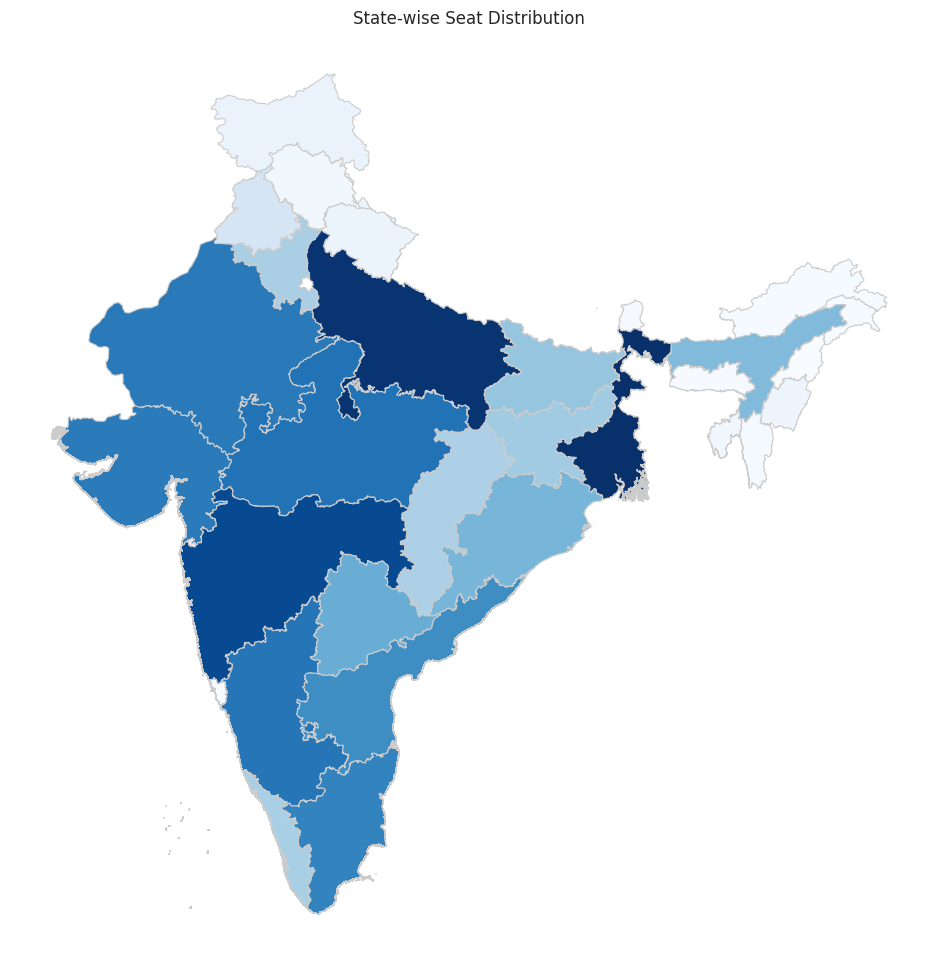

In [176]:
seats = results2.groupby('State')['Total_votes'].sum().reset_index()

merged_data = india_map.merge(seats, how='left', left_on='State', right_on='State')

fig, ax = plt.subplots(figsize=(15, 12))
merged_data.plot(column='Total_votes', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('State-wise Seat Distribution')
ax.set_axis_off()
plt.show()

Performance of famous leaders:

In [177]:
leaders = ['Rahul Gandhi', 'Narendra Modi', 'Akhilesh Yadav']
filtered_results = results2[results2['Winning Candidate'].isin(leaders)]

margin_of_victory = filtered_results[filtered_results['Winning Candidate'].isin(leaders)][['Winning Candidate', 'Parliamentary Constituency', 'Margin']]
print(margin_of_victory)


    Winning Candidate Parliamentary Constituency    Margin
265    Akhilesh Yadav                    Kannauj  170922.0
421      Rahul Gandhi                 Rae Bareli  390030.0
529     Narendra Modi                   Varanasi  152513.0
539      Rahul Gandhi                    Wayanad  364422.0


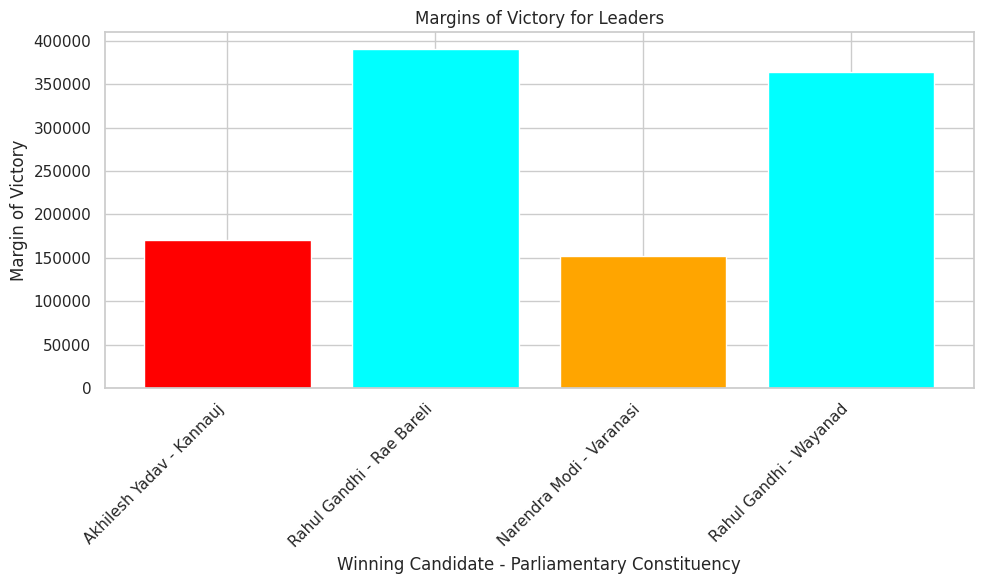

In [178]:
plt.figure(figsize=(10, 6))
colors = {'Rahul Gandhi': 'cyan', 'Narendra Modi': 'orange', 'Akhilesh Yadav': 'red'}
plt.bar(filtered_results['Winning Candidate'] + ' - ' + filtered_results['Parliamentary Constituency'],
        filtered_results['Margin'],color=[colors[c] for c in filtered_results['Winning Candidate']])
plt.xlabel('Winning Candidate - Parliamentary Constituency')
plt.ylabel('Margin of Victory')
plt.title('Margins of Victory for Leaders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Performance of Cabinet ministers:

In [179]:
leaders2 = ['Amit Shah', 'Piyush Goyal', 'Rajnath Singh', 'Manohar Lal','Shivraj Singh Chouhan']
filtered_results2 = results2[results2['Winning Candidate'].isin(leaders2)]

margin_of_victory = filtered_results2[filtered_results2['Winning Candidate'].isin(leaders2)][['Winning Candidate', 'Parliamentary Constituency', 'Margin']]
print(margin_of_victory)


         Winning Candidate Parliamentary Constituency    Margin
182              Amit Shah                Gandhinagar  744716.0
274            Manohar Lal                     Karnal  232577.0
354           Piyush Goyal               Mumbai North  357608.0
531  Shivraj Singh Chouhan                    Vidisha  821408.0


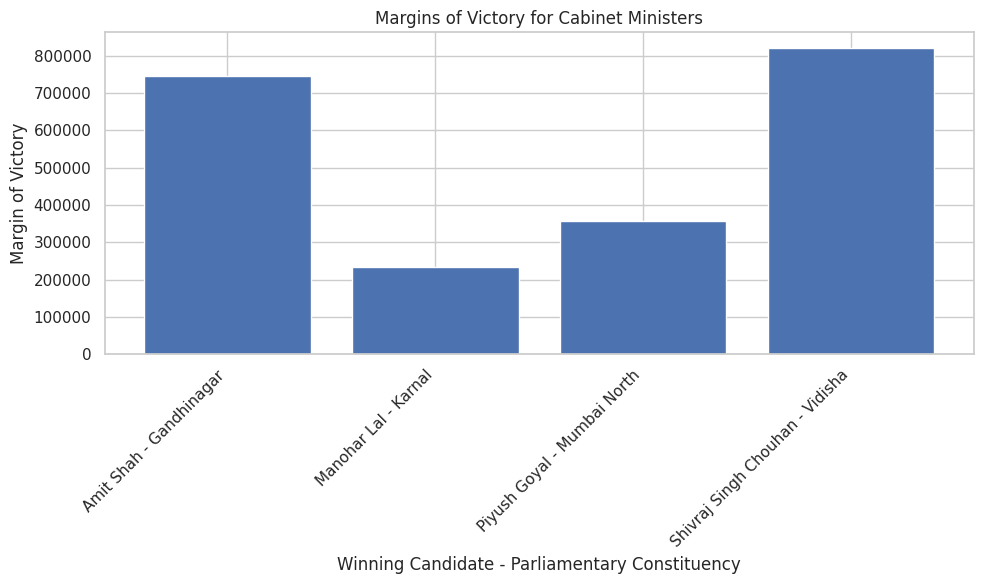

In [180]:
plt.figure(figsize=(10, 6))
plt.bar(filtered_results2['Winning Candidate'] + ' - ' + filtered_results2['Parliamentary Constituency'],
        filtered_results2['Margin'])
plt.xlabel('Winning Candidate - Parliamentary Constituency')
plt.ylabel('Margin of Victory')
plt.title('Margins of Victory for Cabinet Ministers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Performance of Alliances (INDIA and NDA):

In [221]:
results3=results_df.copy()
nda_parties = [
    'Bharatiya Janta Party', 'Telugu Desam', 'Janata Dal (United)', 'Shiv Sena',
    'Lok Janshakti Party(Ram Vilas)', 'Nationalist Congress Party', 'Janata Dal (Secular)',
    'Janasena Party', 'Rashtriya Lok Dal', 'Apna Dal (Soneylal)', 'Asom Gana Parishad',
    'Ajsu Party', 'Hindustani Awam Morcha (Secular)', 'Sikkim Krantikari Morcha',
    'United Peoples Party Liberal'
]

india_parties = [
    'Indian National Congress', 'Samajwadi Party', 'All India Trinamool Congress',
    'Dravida Munnetra Kazhagam', 'Shiv Sena (Uddhav Balasaheb Thackrey)',
    'Nationalist Congress Party – Sharadchandra Pawar', 'Rashtriya Janata Dal',
    'Aam Aadmi Party', 'Communist Party Of India (Marxist)', 'Jharkhand Mukti Morcha',
    'Communist Party Of India (Marxist-Leninist) (Liberation)', 'Jammu and Kashmir National Conference',
    'Communist Party Of India', 'Indian Union Muslim League', 'Viduthalai Chiruthaigal Katchi',
    'Marumalarchi Dravida Munnetra Kazhagam', 'Kerala Congress', 'Rashtriya Loktantrik Party',
    'Bharat Adivasi Party', 'Revolutionary Socialist Party'
]


def categorize_party(party):
    if party in nda_parties:
        return 'NDA'
    elif party in india_parties:
        return 'INDIA'
    else:
        return 'Other'

results3['Alliance'] = results3['Party'].apply(categorize_party)


In [222]:
results3.head()

,Parliamentary Constituency,PC_no,State,Winning Candidate,Party,Total_electors,Total_votes,Turnout,Margin,Margin_Percent,Alliance
0,Adilabad,1,Telangana,Godam Nagesh,Bharatiya Janta Party,"16,50,175","12,35,597",74.90%,"90,652",7.30%,NDA
1,Agra,18,Uttar Pradesh,Prof S P Singh Baghel,Bharatiya Janta Party,"20,72,685","11,23,779",54.20%,"2,71,294",24.10%,NDA
2,Ahmadnagar,37,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,"19,81,866","13,25,477",66.90%,"28,929",2.20%,INDIA
3,Ahmedabad East,7,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,"20,38,162","11,28,339",55.40%,"4,61,755",40.90%,NDA
4,Ahmedabad West,8,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,"17,26,987","9,66,646",56.00%,"2,86,437",29.60%,NDA


In [223]:
seats_by_alliance = results3.groupby('Alliance').size()
print(seats_by_alliance)

Alliance
INDIA    234
NDA      293
Other     16
dtype: int64


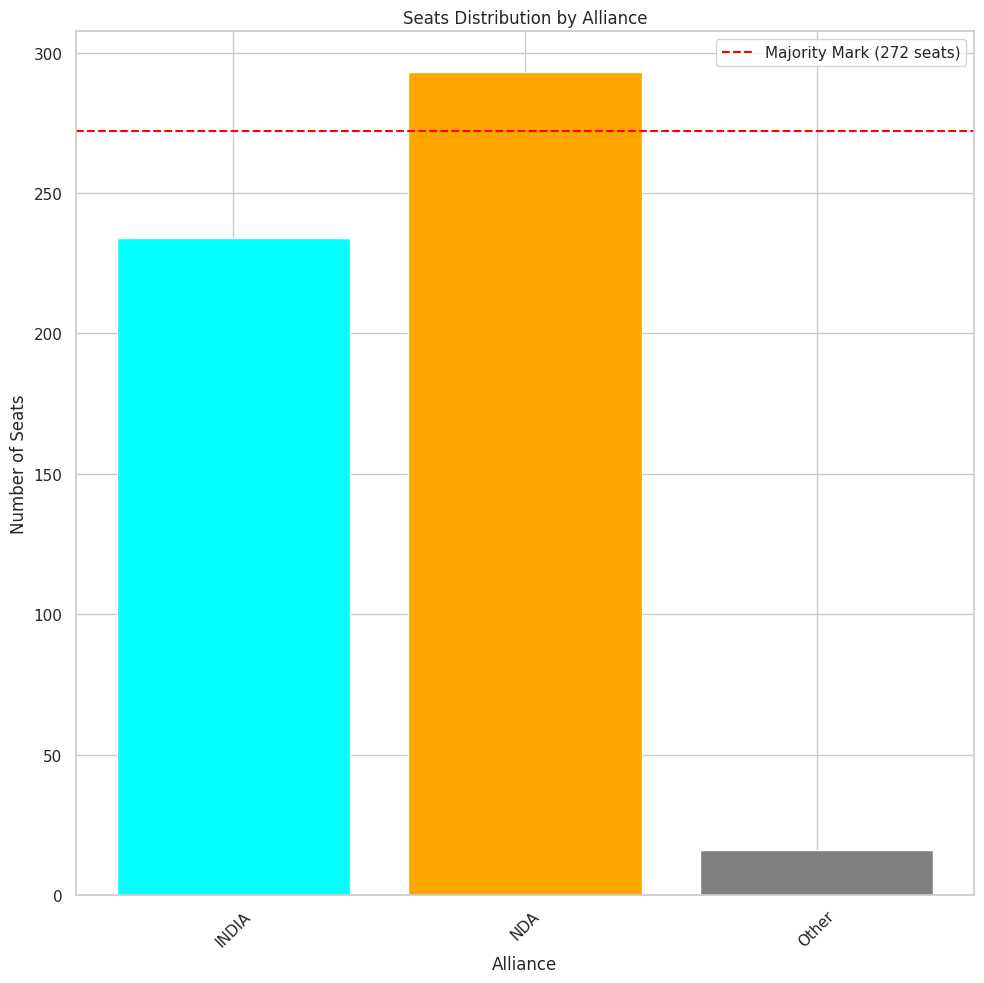

In [224]:
plt.figure(figsize=(10,10))
plt.axhline(y=272, color='red', linestyle='--', label='Majority Mark (272 seats)')
plt.legend()
plt.bar(seats_by_alliance.index, seats_by_alliance.values, color=['cyan', 'orange', 'gray'])
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
plt.title('Seats Distribution by Alliance')
plt.xticks(rotation=45)
plt.tight_layout()

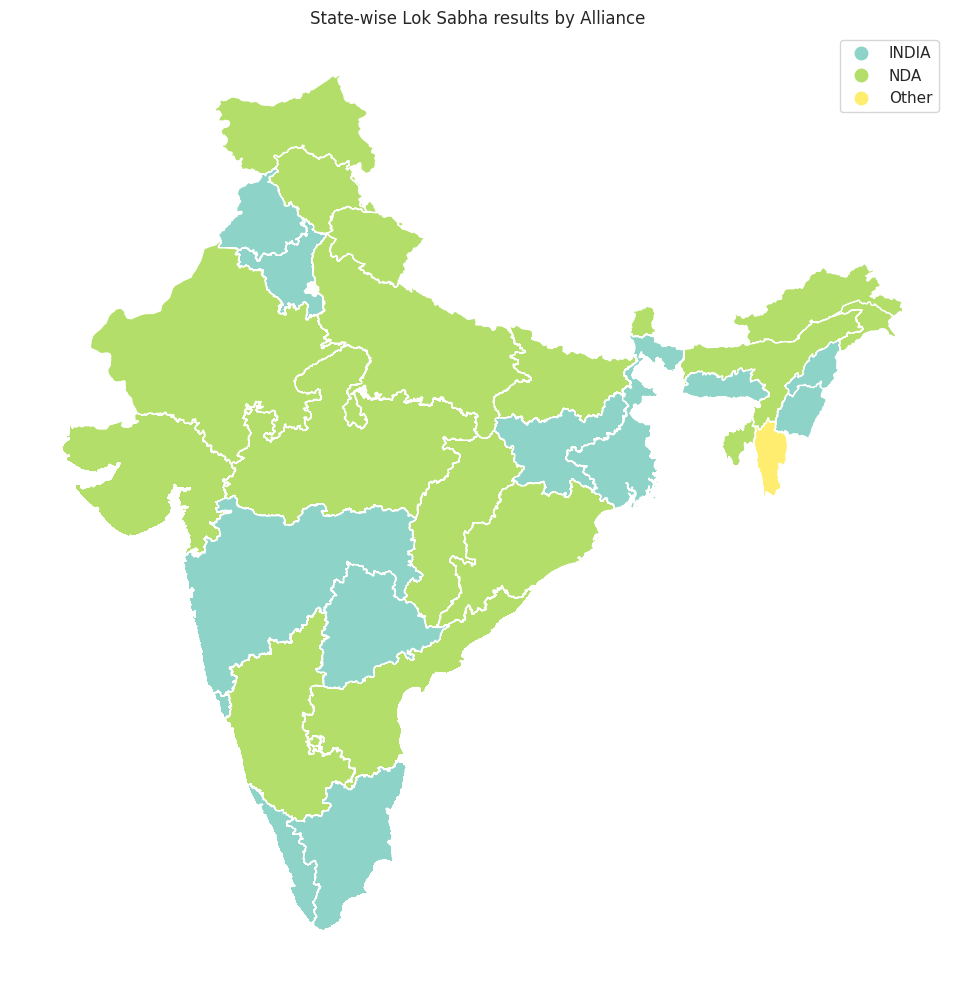

In [225]:
merged_data = india_map.merge(results3, left_on='State', right_on='State', how='left')

fig, ax = plt.subplots(figsize=(12, 10))


merged_data.plot(column='Alliance', ax=ax, legend=True, cmap='Set3', categorical=True)

ax.set_title('State-wise Lok Sabha results by Alliance')
ax.set_axis_off()
plt.tight_layout()
plt.show()

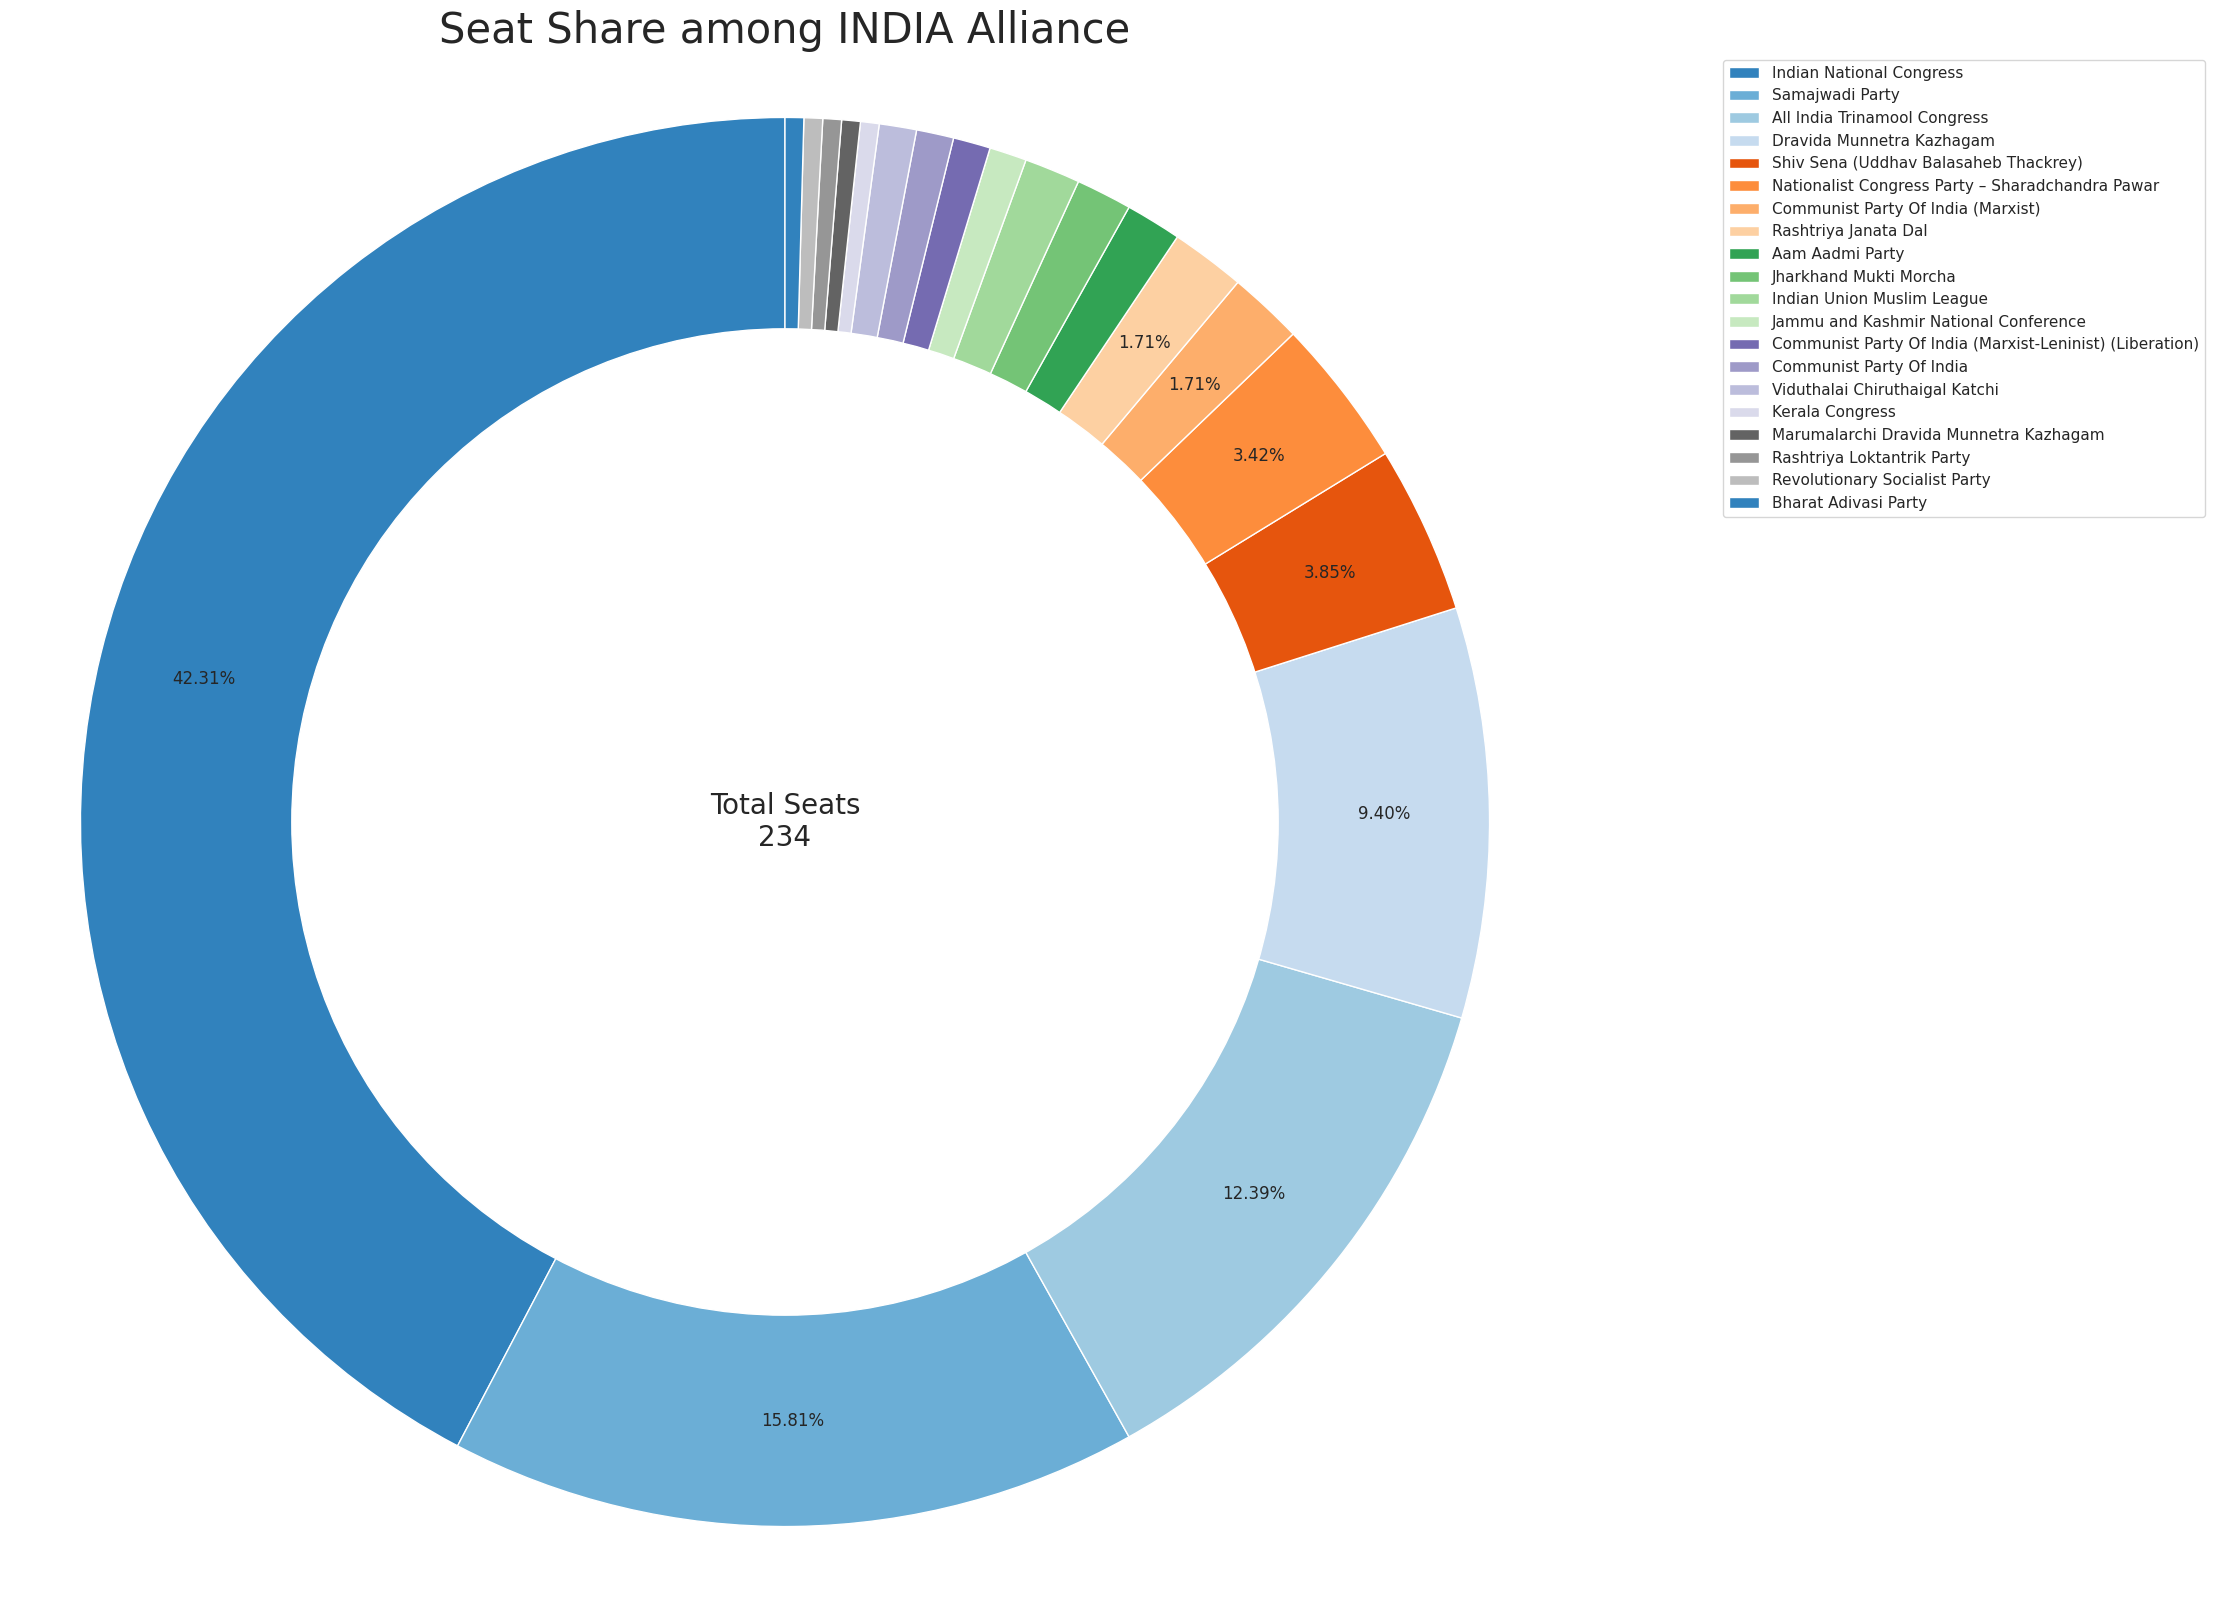

In [226]:
seat_counts_india = results3[results3['Alliance'] == 'INDIA'].groupby('Party')['Parliamentary Constituency'].count().reset_index()
seat_counts_india.columns = ['Party', 'Seat_Count']


seat_counts_india = seat_counts_india.sort_values(by='Seat_Count', ascending=False)


party_names = seat_counts_india['Party'].tolist()
seat_counts = seat_counts_india['Seat_Count'].tolist()
total_seats = sum(seat_counts)

plt.figure(figsize=(20,20))

autopct = lambda v: f'{v:.2f}%' if v > 1.5 else None
outer = plt.pie(seat_counts, labels=None, colors=colors, autopct=autopct, startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(0, 0, f'Total Seats\n{total_seats}', ha='center', va='center', fontsize=20)
plt.legend(labels=party_names, loc='best', bbox_to_anchor=(1.1, 1))
plt.title('Seat Share among INDIA Alliance',fontsize=30)
plt.axis('equal')
plt.show()


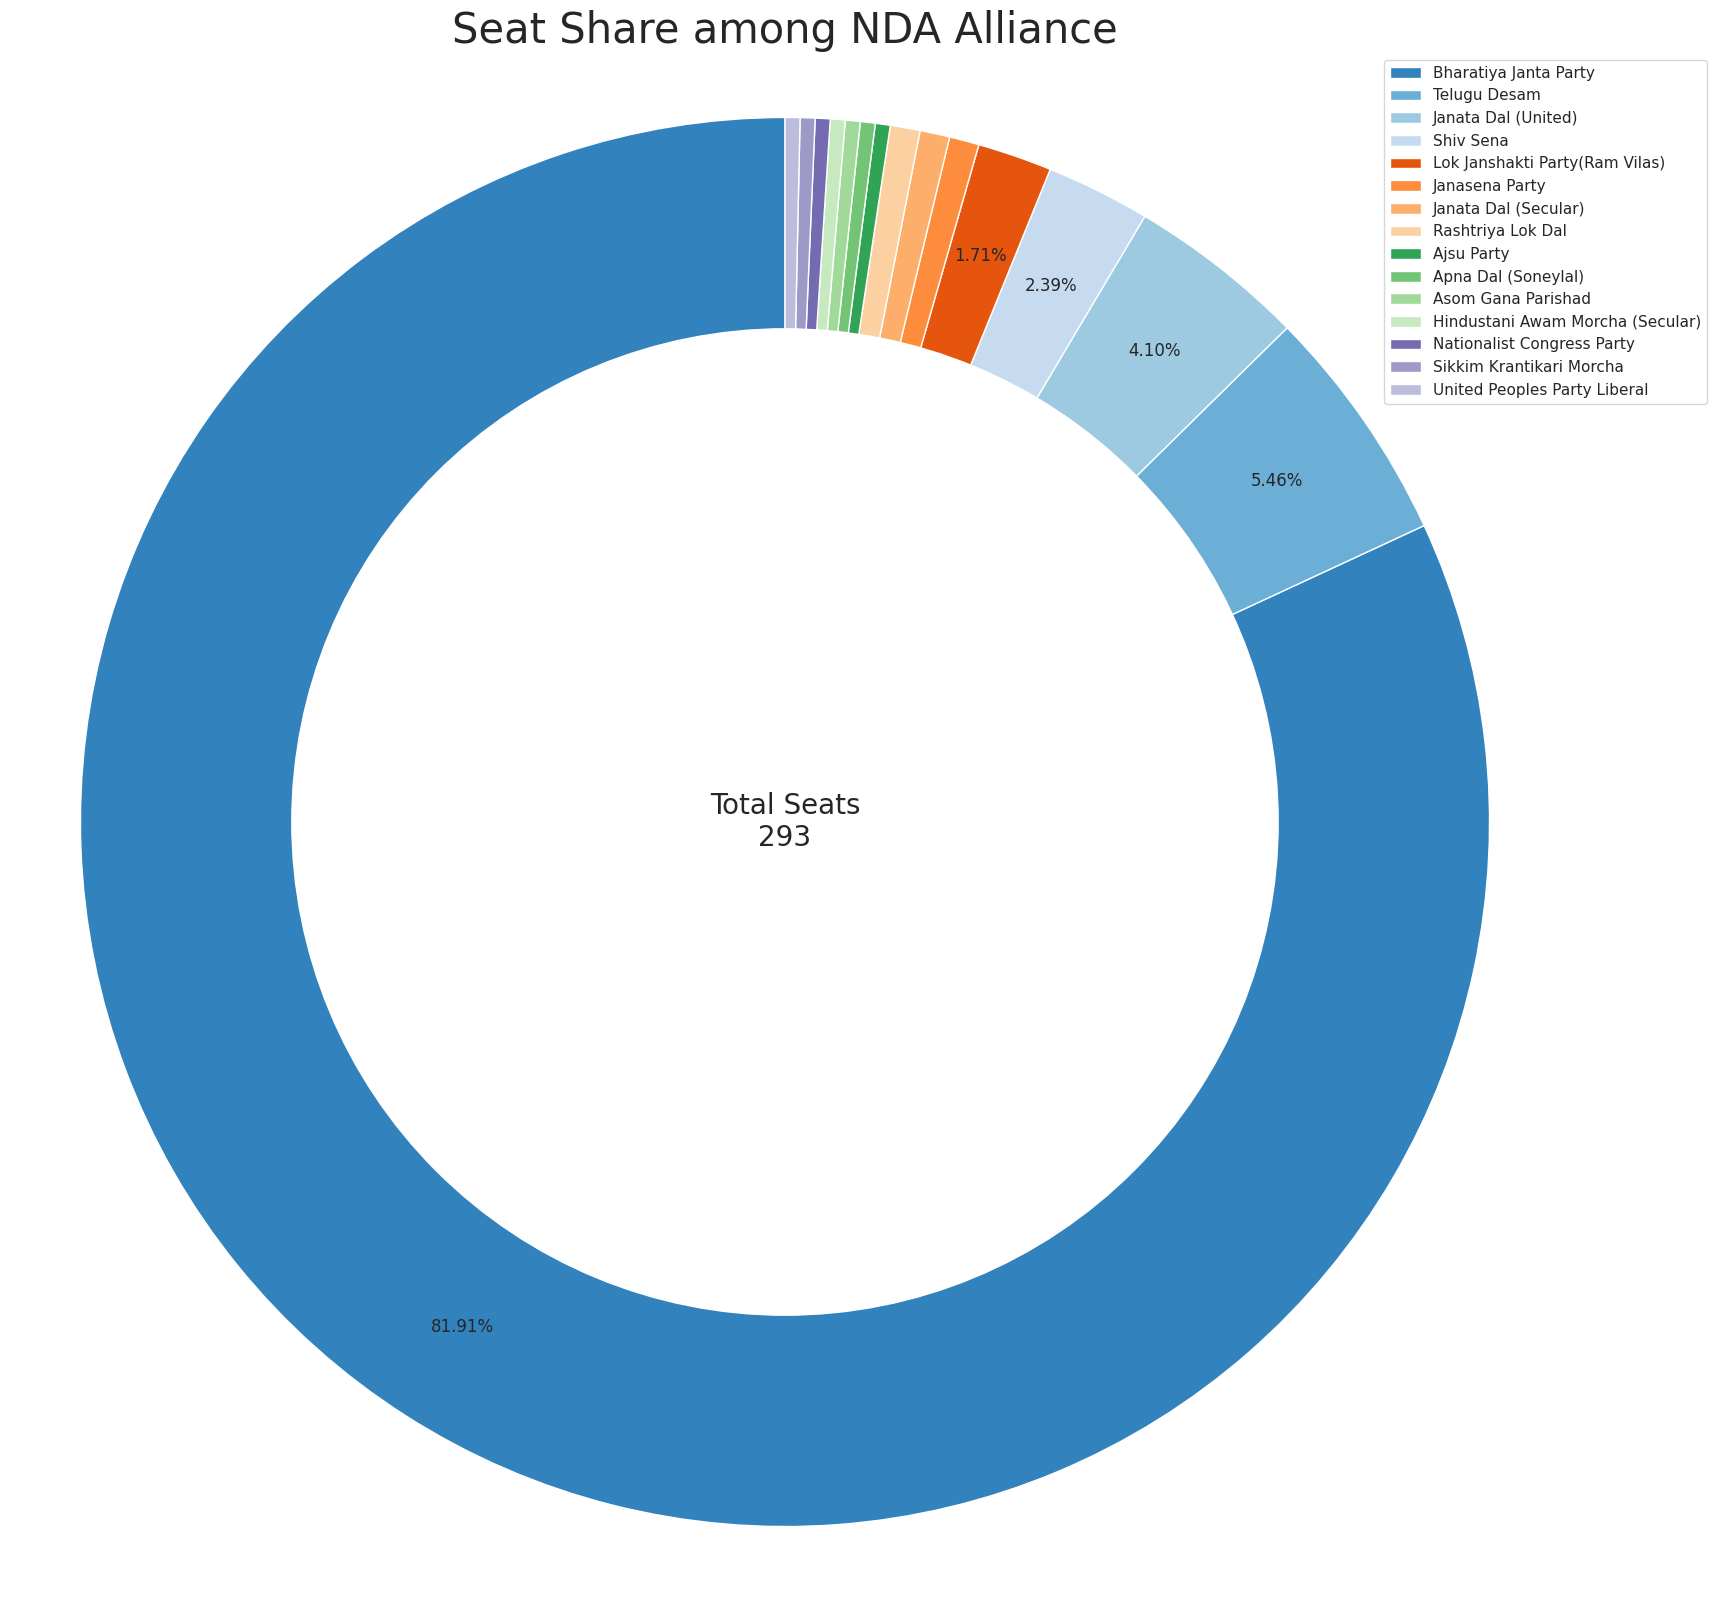

In [227]:
seat_counts_nda = results3[results3['Alliance'] == 'NDA'].groupby('Party')['Parliamentary Constituency'].count().reset_index()
seat_counts_nda.columns = ['Party', 'Seat_Count']

seat_counts_nda = seat_counts_nda.sort_values(by='Seat_Count', ascending=False)


party_names = seat_counts_nda['Party'].tolist()
seat_counts = seat_counts_nda['Seat_Count'].tolist()
total_seats = sum(seat_counts)

plt.figure(figsize=(20,20))

autopct = lambda v: f'{v:.2f}%' if v > 1.5 else None
outer = plt.pie(seat_counts, labels=None, colors=colors, autopct=autopct, startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(0, 0, f'Total Seats\n{total_seats}', ha='center', va='center', fontsize=20)
plt.legend(labels=party_names, loc='best', bbox_to_anchor=(1.1, 1))
plt.title('Seat Share among NDA Alliance',fontsize=30)
plt.axis('equal')
plt.show()



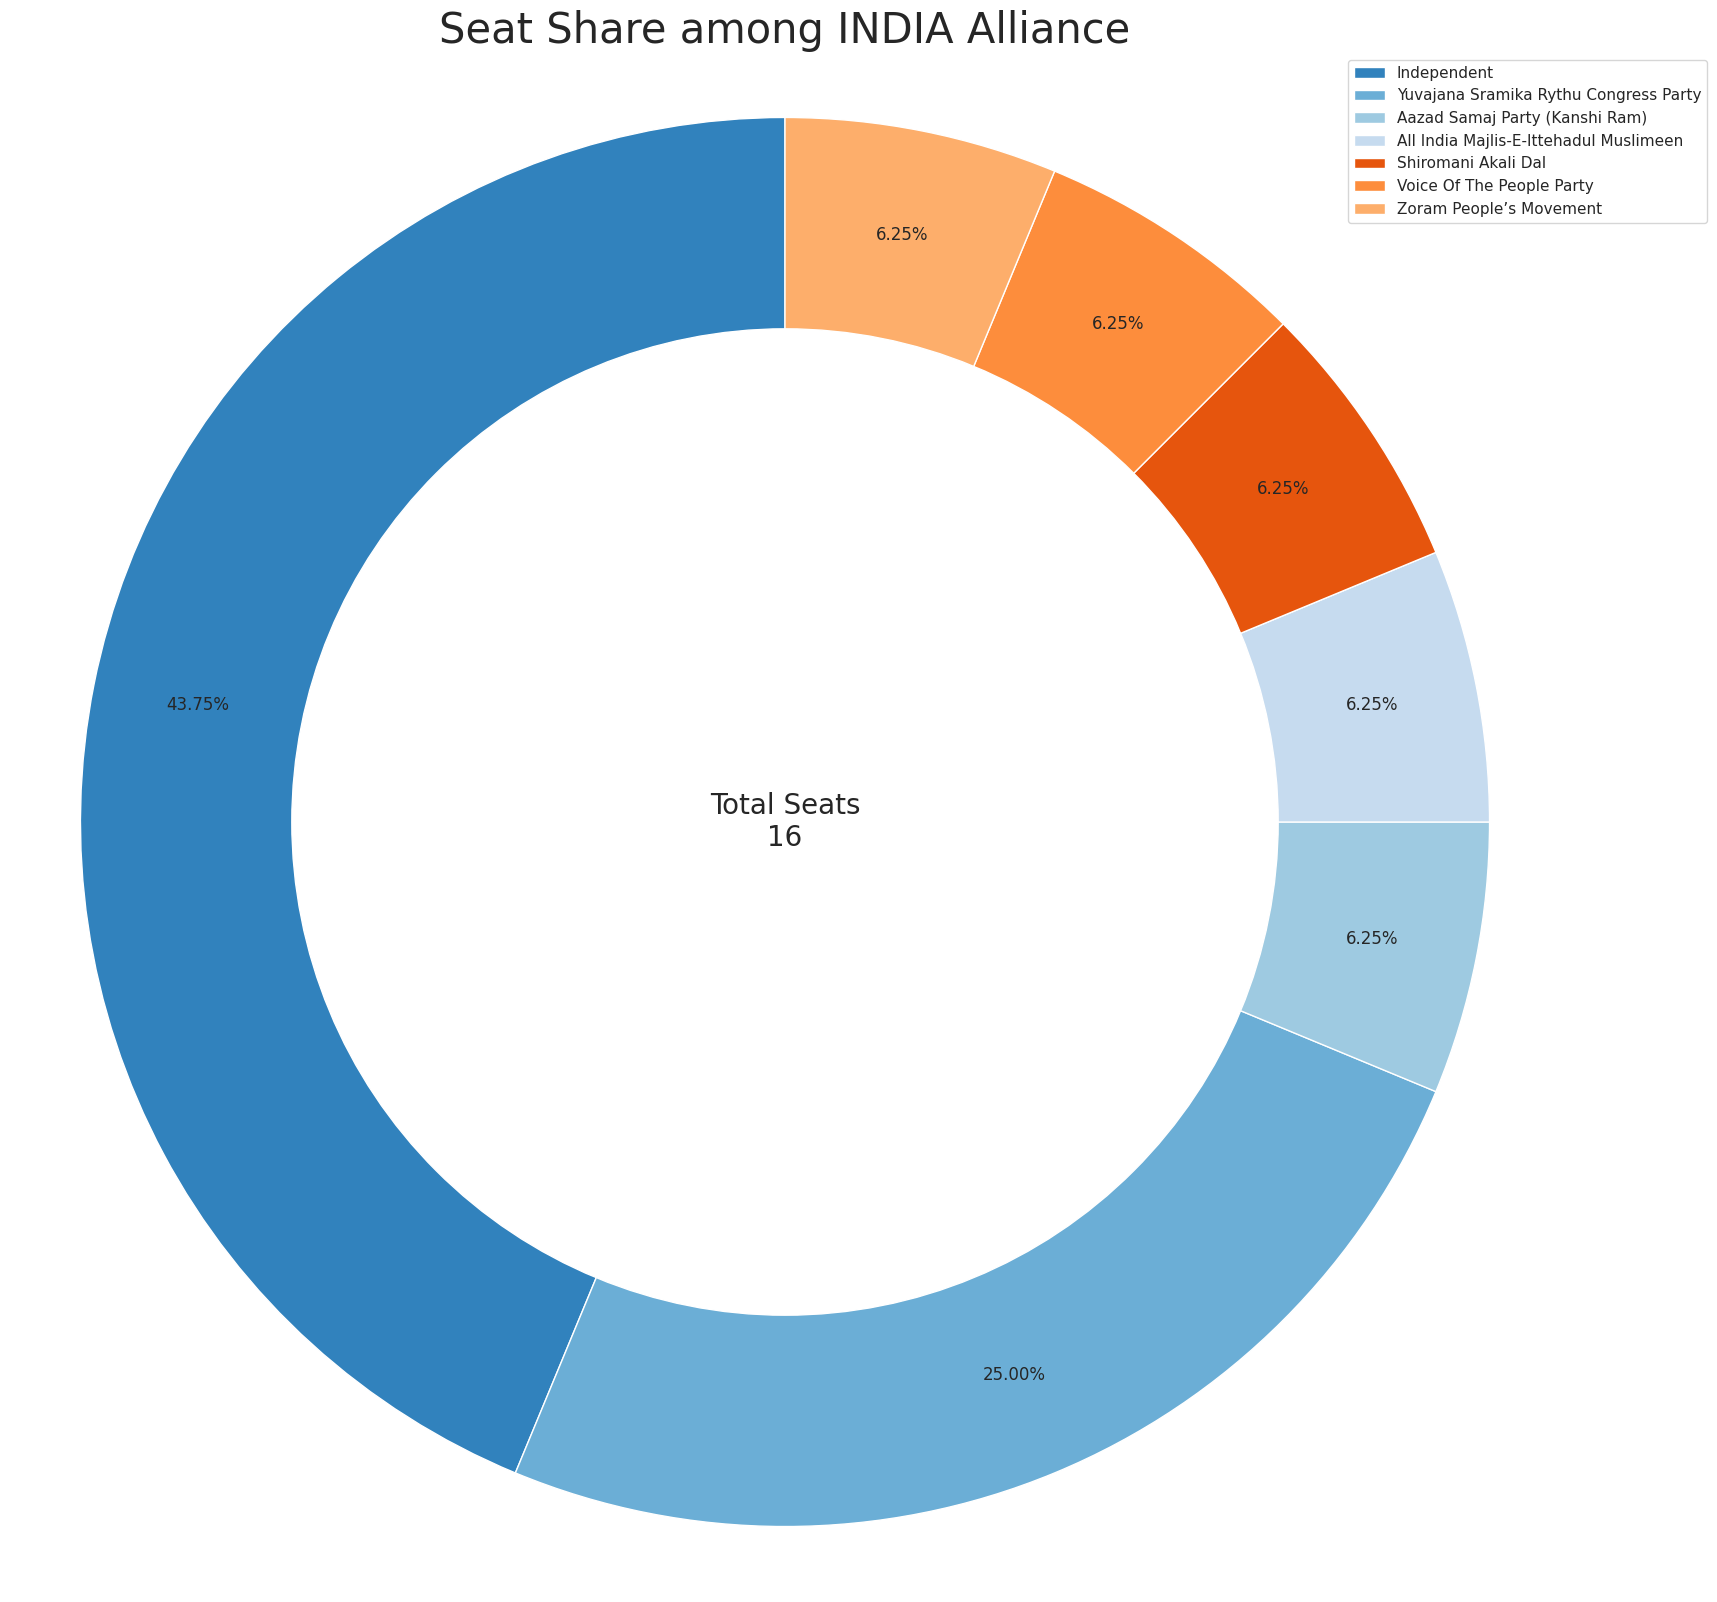

In [228]:
seat_counts_others = results3[results3['Alliance'] == 'Other'].groupby('Party')['Parliamentary Constituency'].count().reset_index()
seat_counts_others.columns = ['Party', 'Seat_Count']

seat_counts_others = seat_counts_others.sort_values(by='Seat_Count', ascending=False)


party_names = seat_counts_others['Party'].tolist()
seat_counts = seat_counts_others['Seat_Count'].tolist()
total_seats = sum(seat_counts)

plt.figure(figsize=(20,20))

autopct = lambda v: f'{v:.2f}%' if v > 1.5 else None
outer = plt.pie(seat_counts, labels=None, colors=colors, autopct=autopct, startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(0, 0, f'Total Seats\n{total_seats}', ha='center', va='center', fontsize=20)
plt.legend(labels=party_names, loc='best', bbox_to_anchor=(1.1, 1))
plt.title('Seat Share among INDIA Alliance',fontsize=30)
plt.axis('equal')
plt.show()